In [72]:
using RCall
using Plots
using EmpiricalBayes
using Distributions
using KernelDensity
using LaTeXStrings
using JLD2
using StatsBase
using Random
using Measures

In [14]:
pgfplots()

Plots.PGFPlotsBackend()

In [17]:
xs = Float64.(collect(-3:.2:3));

In [10]:
mycols =["#424395" "#EB549A" "#5EC2DA" "#EBC915" "#018AC4"  "#550133"]

1×6 Array{String,2}:
 "#424395"  "#EB549A"  "#5EC2DA"  "#EBC915"  "#018AC4"  "#550133"

In [76]:
JLD2.@load "cached_results/ceb_prostate_posterior_mean.jld2" post_mean_cis
post_mean_cis = post_mean_cis[6:36];
left_ci_post_mean = [t.ci_left for t in post_mean_cis]
right_ci_post_mean =  [t.ci_right for t in post_mean_cis]
point_est_post_mean  = [t.calibrated_target for t in post_mean_cis];
pilot_post_mean = [t.est_target for t in post_mean_cis];

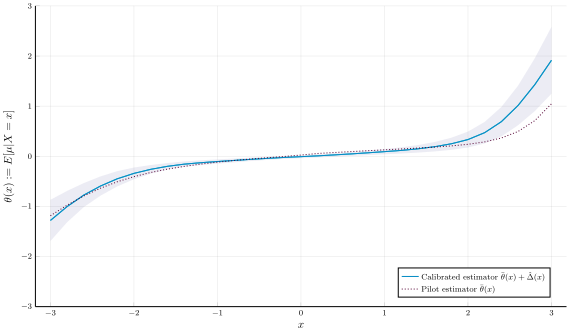

In [77]:
p1 = plot(xs, [point_est_post_mean point_est_post_mean], 
          fillrange=[left_ci_post_mean right_ci_post_mean],
          fillalpha=0.1, fillcolor=mycols[1],
          label="", 
          color=[mycols[3] mycols[3]],
          line=([:solid :solid]),
          ylabel=L"\theta(x) := E[\mu | X=x]",
          xlabel=L"x", ylim=(-3,3))
plot!(p1, xs, [point_est_post_mean pilot_post_mean],
          line=([:solid :dot]),
          color=[mycols[5] mycols[6]], #marker=:circlemmarkerstrokealpha =0,
          legend=:bottomright, 
          label=[L"Calibrated estimator $\bar{\theta}(x) + \hat{\Delta}(x)$" L"Pilot estimator $\bar{\theta}(x)$"])

In [92]:
JLD2.@load "cached_results/ceb_prostate_lfsr.jld2" lfsr_cis
lfsr_cis = lfsr_cis[6:36];
left_ci_lfsr = max.(0,[t.ci_left for t in lfsr_cis])
right_ci_lfsr =  min.(1,[t.ci_right for t in lfsr_cis])
point_est_lfsr  = [t.calibrated_target for t in lfsr_cis];
pilot_lfsr = [t.est_target for t in lfsr_cis];

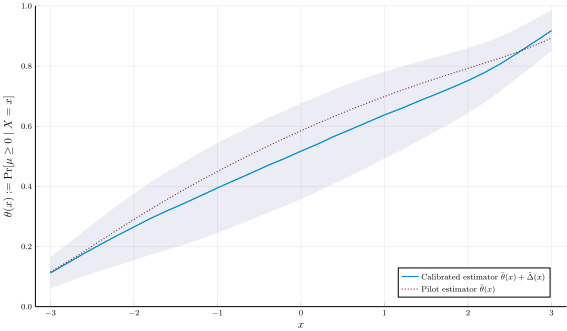

In [79]:
p2 = plot(xs, [point_est_lfsr point_est_lfsr], 
          fillrange=[left_ci_lfsr right_ci_lfsr],
          fillalpha=0.1, fillcolor=mycols[1],
          label="", 
          color=[mycols[3] mycols[3]],
          line=([:solid :solid]),
          ylabel=L"\theta(x) := \Pr[\mu \geq 0 \mid X=x]",
          xlabel=L"x", ylim=(0,1))
plot!(p2, xs, [point_est_lfsr pilot_lfsr],
          line=([:solid :dot]),
          color=[mycols[5] mycols[6]], #marker=:circlemmarkerstrokealpha =0,
          legend=:bottomright, 
          label=[L"Calibrated estimator $\bar{\theta}(x) + \hat{\Delta}(x)$" L"Pilot estimator $\bar{\theta}(x)$"])

In [80]:
@load "cached_results/chetty_post_mean_Jan10.jld2"

left_ci_post_mean = [t.ci_left for t in post_mean_cis]
right_ci_post_mean =  [t.ci_right for t in post_mean_cis]
point_est_post_mean  = [t.calibrated_target for t in post_mean_cis];
pilot_post_mean = [t.est_target for t in post_mean_cis];

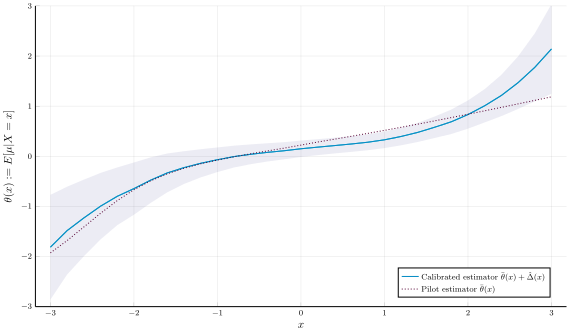

In [81]:
p3 = plot(xs, [point_est_post_mean point_est_post_mean],
          fillrange=[left_ci_post_mean right_ci_post_mean],
          fillalpha=0.1, fillcolor=mycols[1],
          label="", 
          color=[mycols[3] mycols[3]],
          line=([:solid :solid]),
          ylabel=L"\theta(x) := E[\mu | X=x]",
          xlabel=L"x", ylim=(-3,3))
plot!(p3, xs, [point_est_post_mean pilot_post_mean],
          line=([:solid :dot]),
          color=[mycols[5] mycols[6]], #marker=:circlemmarkerstrokealpha =0,
          legend=:bottomright, 
          label=[L"Calibrated estimator $\bar{\theta}(x) + \hat{\Delta}(x)$" L"Pilot estimator $\bar{\theta}(x)$"])

In [96]:
@load "cached_results/chetty_lfsr_cis_Jan10.jld2"
left_ci_lfsr = [t.ci_left for t in lfsr_cis]
right_ci_lfsr =  min.(1,[t.ci_right for t in lfsr_cis])
point_est_lfsr  = [t.calibrated_target for t in lfsr_cis];
pilot_lfsr = [t.est_target for t in lfsr_cis];

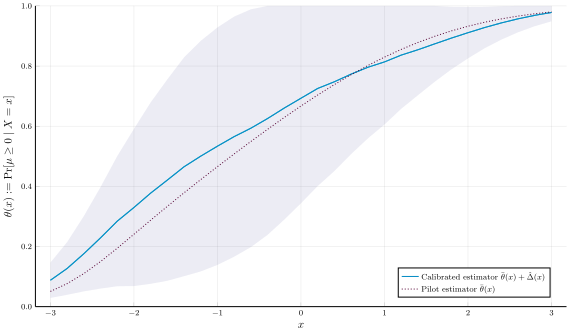

In [89]:
p4= plot(xs, [point_est_lfsr point_est_lfsr],
          fillrange=[left_ci_lfsr right_ci_lfsr],
          fillalpha=0.1, fillcolor=mycols[1],
          label="", 
          color=[mycols[3] mycols[3]],
          line=([:solid :solid]),
          ylabel=L"\theta(x) := \Pr[\mu \geq 0 \mid X=x]",
          xlabel=L"x", ylim=(0,1))
plot!(p4, xs, [point_est_lfsr pilot_lfsr],
          line=([:solid :dot]),
          color=[mycols[5] mycols[6]], #marker=:circlemmarkerstrokealpha =0,
          legend=:bottomright, 
          label=[L"Calibrated estimator $\bar{\theta}(x) + \hat{\Delta}(x)$" L"Pilot estimator $\bar{\theta}(x)$"])

In [84]:
upscale = 0.8#8 #8x upscaling in resolution
default(size=(1000*upscale,600*upscale)) #Plot canvas size

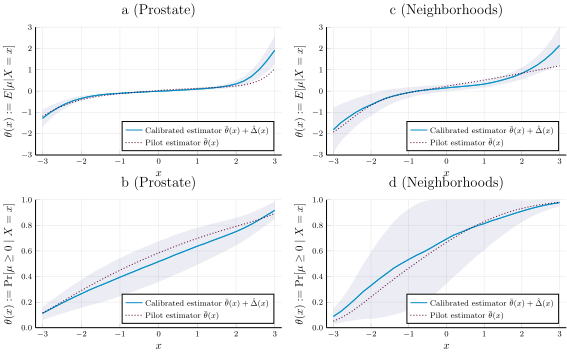

In [102]:
l = @layout grid(2,2)

plot(p1, p3, p2, p4, layout=l, title = ["a (Prostate)" "c (Neighborhoods)" "b (Prostate)" "d (Neighborhoods)"], )

In [103]:
savefig("dataset_plots.pdf")